In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering

In [3]:
# Load in the data and scale it
df = pd.read_csv('data_indiaplant_1_3000.csv', index_col=0)
#df.dropna(inplace=True)

In [4]:
df.fillna('')

,Plant_Id,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
0,1,Epiphyllum oxypetalum,"Queen Of The Night, Dutchmans-pipe Cactus",Marathi - Brahma Kamal,"Cacti & Succulents, Shrubs, Indoor Plants",Rhipsalidopsis,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"May, June, July, August, September",Green,1 to 2 meters,1 to 2 meters,"Irregular, Upright or Erect",,"Fragrant flowers or leaves, Auspicious or Feng...","Origin - Mexico to Brazil, Large, flat, thin, ...",Bright indirect sunlight to direct sunlight is...
1,2,Euphorbia grandicornis,Cow Horn Euphorbia,,"Cacti & Succulents, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"September, October, November, Flowers are inco...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,,"Animals will not eat, Thorny or Spiny","Nation-Africa, Asia, Shrub grow-3 feet tall, B...","Full sun min 4 hours of sunlight, Sand in pott..."
2,4,Euphorbia milli thai hybrid,Crown Of Thorns New Hybrids,,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,,"Auspicious or Feng Shui plant, Good for Hedges...",This page is dedicated to no particular variet...,Full to diffused sunlight best. Minimum 3 to 4...
3,5,Euphorbia milli speciosa rubra,Crown Of Thorns - Red,,"Cacti & Succulents, Flowering Pot Plants, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,50 cms to 100 cms,50 cms to 100 cms,Spreading,,"Good for Hedges and Borders, Good for Edges ie...","A small flowered type of the euphorbia milli.,...",Full to diffused sunlight best. Minimum 3 to 4...
4,7,Euphorbia milli thai hybrid orange,Euphorbia Milli Thai Hyb Orange,,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,,"Auspicious or Feng Shui plant, Good for Hedges...",Extremely large flowered plants of the Thai go...,Full to diffused sunlight best. Minimum 3 to 4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2996,Garcinia indica variegated,Garcinia Variegated,"Hindi - Kokum Variegated, Marathi - Bheranda, ...","Trees, Medicinal Plants, Shrubs",Guttiferae or Nutmeg family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,"Variegated, Green, White",4 to 6 meters,2 to 4 meters,Upright or Erect,,"Indigenous (native to India), Auspicious or Fe...",This is a variegated leaf form of the regular ...,"Grows best in red lateratic fertile soils., Re..."
906,2997,Ficus cyatbistipula,,,"Shrubs, Trees",Moraceae or Fig family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,Green,4 to 6 meters,2 to 4 meters,Upright or Erect,,"Good for screening, Good for Hedges and Border...","A large leaved ficus., It can be distinguished...",As with most ficus this one too is easy to gro...
907,2998,Zephyranthes candida flava,Zephyranthes Cream Color,,"Lilies & Bulbous plants, Groundcovers, Bamboos...",Amarylidaceae or Agave or Amaryllis family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,Less than 50 cms,Less than 50 cms,"Spreading, Upright or Erect",,"Good for Edges ie very small hedge or border, ...","Native of Americas., Off white flowers that ar...","Plants are very hardy and easy to grow., Shoul..."
908,2999,Syagrus sch

In [5]:
# Load in the data and scale it
med_data = pd.read_csv('Med_data.csv', sep=";", index_col=0, converters={'Med_Plant_Use':eval})
med_data

,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,...,Med_Plant_Id,Med_Scientific_name,Med_Plant_Name_Mapped,Med_Plant_Use,Med_Kingdom,Med_Family,Med_Group,Med_Common_Name,Med_Synonymous_names,Med_System_of_medicine
Plant_Id,,,,,,,,,,,,,,,,,,,,,
42,Centella asiatica,"Brahmi Big Leaved, Brahma-manduki, Brahm","Hindi - Brahma-manduki, Bengali - Potari, Guja...","Medicinal Plants, Groundcovers",Apiaceae or Carrot family,"Sun growing, Semi shade",Normal,Foliage,"May, June, July, August, September, October, N...",Green,...,2394,Centella asiatica,Centella asiatica,"[[None, Eczema], [leaf, Syphilis], [None, Psor...",Plantae,Apiaceae,Angiosperms,Indian Pennywort,"Hydrocotyle asiatica, Centella asiatica, Cante...","Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani"
43,Abrus precatorius,"Indian Licorice, Chanoti, Deadly Crabs Eye","Marathi - Gunja, Assamese - Liluwani, Bengali ...","Medicinal Plants, Climbers, Creepers & Vines, ...",Leguminosae or Fabaceae or Pea family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Foliage,"March, April, August",Green,...,18,Abrus precatorius,Abrus precatorius,"[[None, Cathartics], [fruit, Eye diseases], [s...",Plantae,Leguminosae,Angiosperms,Rosary Pea,"Abrus precatorius, Abrus precatorious, Abies p...","Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani"
143,"Anacardium occidentale, Acajou occidentale","Cashew Nut, Kaju, Cashew Apple","Marathi - Kaju, Hindi - Kaju, Bengali - Hijiba...","Fruit Plants, Trees, Medicinal Plants",Anacardiaceae or Mango or Cashew family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Fruit or Seed,"January, February, November, December, Flowers...","Green, Red",...,606,Anacardium occidentale,Anacardium occidentale,"[[fruit, Mental disorders], [fruit, Hemorrhage...",Plantae,Anacardiaceae,Angiosperms,Cashew,"Anacardium occidentale, Anacardium occidantale","Ayurveda, Homeopathy, Siddha, Unani"
144,Annona squammosa,"Custard Apple, Sugar Apple","Marathi - Sita Phal, Hindi - Sita Phal, Sharifa","Fruit Plants, Trees, Shrubs",Annonaceae or Custard apple family,"Sun growing, Semi shade","Normal, Can tolerate less",Fruit or Seed,"May, June, July, August, Flowers are inconspic...",Green,...,749,Annona squamosa,Annona squamosa,"[[seed, Anthelmintics], [seed, Lung neoplasms]...",Plantae,Annonaceae,Angiosperms,Sugar Apple,"Annona squamosa, Anona squamosa, Annona squanosa","Ayurveda, Siddha, Unani"
147,Averrhoa carambola,"Star Fruit, Carambole, Oxalis Tree","Marathi - Kamrak, Kamarakha, Hindi - Khamrak, ...","Fruit Plants, Trees, Medicinal Plants",Oxalidaceae,"Sun growing, Semi shade","Normal, Can tolerate more",Fruit or Seed,"Year-around flowering, Flowers in flushes thro...",Green,...,1261,Averrhoa carambola,Averrhoa carambola,"[[fruit, Asthenia], [None, Asthma], [fruit, Di...",Plantae,Oxalidaceae,Angiosperms,Star Fruit,Averrhoa carambola,"Ayurveda, Siddha, Unani"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,"Argemone mexicana, A. leiocarpa, A. mucronata,...","Mexican Poppy, Mexican Prickly Poppy, Cardosanto","Marathi - Daruri, Firangi-kote-pavola, Dhotara...","Shrubs, Groundcovers, Medicinal Plants",Papaveraceae or Poppy family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,Year-around flowering,Green,...,903,Argemone mexicana,Argemone mexicana,"[[None, Cathartics], [None, Eczema], [seed, An...",Plantae,Papaveraceae,Angiosperms,Mexican Prickly Poppy,"Argemone mexicana, Argemene mexicana","Ayurveda, Homeopathy, Siddha, Unani"
2926,"Abelmoschus moschatus, Hibiscus abelmoschu","Ambrette Seeds, Hibiscus Abelmoschus, Musk Mal...",NaN,Shrubs,Malvaceae Hibiscus or Cotton family,"Sun growing, Semi shade",Normal,Fruit or Seed,Year-around flowering,Green,...,13,Abelmoschus moschatus,Abelmoschus moschatus,"[[seed, Anthelmintics], [None, Halitosis], [se...",Plantae,Malvaceae,Angiosperms,Pink Swamp Mallow,"Hibiscus abelmo

In [6]:
parts = []
for index, row in med_data.iterrows():
    for item in row['Med_Plant_Use']:
        parts.append(item[0])
        
set(parts)

{'None',
 'aerial part',
 'bark',
 'bulb',
 'flower',
 'fruit',
 'leaf',
 'plant exudate',
 'plant fibers',
 'rhizome',
 'root',
 'seed',
 'seedling',
 'shoot',
 'stem',
 'tuber',
 'vegetable',
 'whole plant',
 'whole plant excluding root',
 'wood'}

In [7]:
def remove_med(df_test):
    part = ['seedling', 'leaf', 'bark', 'fruit', 'flower', 'seed', 'vegetable', 'root', 'whole plant', 'stem', 'wood']
    final_list = []
    for index, row in df_test.iterrows():
        mid_list = []
        if row['Med_Plant_Use'] is not None:
            for item in row['Med_Plant_Use']:
                if item[0] in part:
                    mid_list.append(item)
        else:
            print(row['Plant_Id'])
        final_list.append(mid_list)
    df_test['Plant_Use'] = final_list
    return df_test

In [8]:
med_c= med_data.copy()

In [9]:
med_data_new = remove_med(med_c)
med_data_new

,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,...,Med_Scientific_name,Med_Plant_Name_Mapped,Med_Plant_Use,Med_Kingdom,Med_Family,Med_Group,Med_Common_Name,Med_Synonymous_names,Med_System_of_medicine,Plant_Use
Plant_Id,,,,,,,,,,,,,,,,,,,,,
42,Centella asiatica,"Brahmi Big Leaved, Brahma-manduki, Brahm","Hindi - Brahma-manduki, Bengali - Potari, Guja...","Medicinal Plants, Groundcovers",Apiaceae or Carrot family,"Sun growing, Semi shade",Normal,Foliage,"May, June, July, August, September, October, N...",Green,...,Centella asiatica,Centella asiatica,"[[None, Eczema], [leaf, Syphilis], [None, Psor...",Plantae,Apiaceae,Angiosperms,Indian Pennywort,"Hydrocotyle asiatica, Centella asiatica, Cante...","Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","[[leaf, Syphilis], [whole plant, Elephantiasis..."
43,Abrus precatorius,"Indian Licorice, Chanoti, Deadly Crabs Eye","Marathi - Gunja, Assamese - Liluwani, Bengali ...","Medicinal Plants, Climbers, Creepers & Vines, ...",Leguminosae or Fabaceae or Pea family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Foliage,"March, April, August",Green,...,Abrus precatorius,Abrus precatorius,"[[None, Cathartics], [fruit, Eye diseases], [s...",Plantae,Leguminosae,Angiosperms,Rosary Pea,"Abrus precatorius, Abrus precatorious, Abies p...","Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","[[fruit, Eye diseases], [seed, Cholera], [root..."
143,"Anacardium occidentale, Acajou occidentale","Cashew Nut, Kaju, Cashew Apple","Marathi - Kaju, Hindi - Kaju, Bengali - Hijiba...","Fruit Plants, Trees, Medicinal Plants",Anacardiaceae or Mango or Cashew family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Fruit or Seed,"January, February, November, December, Flowers...","Green, Red",...,Anacardium occidentale,Anacardium occidentale,"[[fruit, Mental disorders], [fruit, Hemorrhage...",Plantae,Anacardiaceae,Angiosperms,Cashew,"Anacardium occidentale, Anacardium occidantale","Ayurveda, Homeopathy, Siddha, Unani","[[fruit, Mental disorders], [fruit, Hemorrhage..."
144,Annona squammosa,"Custard Apple, Sugar Apple","Marathi - Sita Phal, Hindi - Sita Phal, Sharifa","Fruit Plants, Trees, Shrubs",Annonaceae or Custard apple family,"Sun growing, Semi shade","Normal, Can tolerate less",Fruit or Seed,"May, June, July, August, Flowers are inconspic...",Green,...,Annona squamosa,Annona squamosa,"[[seed, Anthelmintics], [seed, Lung neoplasms]...",Plantae,Annonaceae,Angiosperms,Sugar Apple,"Annona squamosa, Anona squamosa, Annona squanosa","Ayurveda, Siddha, Unani","[[seed, Anthelmintics], [seed, Lung neoplasms]..."
147,Averrhoa carambola,"Star Fruit, Carambole, Oxalis Tree","Marathi - Kamrak, Kamarakha, Hindi - Khamrak, ...","Fruit Plants, Trees, Medicinal Plants",Oxalidaceae,"Sun growing, Semi shade","Normal, Can tolerate more",Fruit or Seed,"Year-around flowering, Flowers in flushes thro...",Green,...,Averrhoa carambola,Averrhoa carambola,"[[fruit, Asthenia], [None, Asthma], [fruit, Di...",Plantae,Oxalidaceae,Angiosperms,Star Fruit,Averrhoa carambola,"Ayurveda, Siddha, Unani","[[fruit, Asthenia], [fruit, Diarrhea], [leaf, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,"Argemone mexicana, A. leiocarpa, A. mucronata,...","Mexican Poppy, Mexican Prickly Poppy, Cardosanto","Marathi - Daruri, Firangi-kote-pavola, Dhotara...","Shrubs, Groundcovers, Medicinal Plants",Papaveraceae or Poppy family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,Year-around flowering,Green,...,Argemone mexicana,Argemone mexicana,"[[None, Cathartics], [None, Eczema], [seed, An...",Plantae,Papaveraceae,Angiosperms,Mexican Prickly Poppy,"Argemone mexicana, Argemene mexicana","Ayurveda, Homeopathy, Siddha, Unani","[[seed, Antiemetics], [seed, Anthelmintics], [..."
2926,"Abelmoschus moschatus, Hibiscus abelmoschu","Ambrette Seeds, Hibiscus Abelmoschus, Musk Mal...",NaN,S

In [10]:
med_data_new.columns

Index(['Scientific_Name', 'Common_Name', 'Regional_Name', 'Category', 'Family',
       'Light', 'Water', 'Primary_Grown_for', 'Flowering_Season',
       'Foliage_Color', 'Height_or_Length', 'Spread_or_Width', 'Plant_Form',
       'Lifespan', 'Special_Feature', 'Plant_Description', 'Growing_Tips',
       'Name', 'Med_Plant_Id', 'Med_Scientific_name', 'Med_Plant_Name_Mapped',
       'Med_Plant_Use', 'Med_Kingdom', 'Med_Family', 'Med_Group',
       'Med_Common_Name', 'Med_Synonymous_names', 'Med_System_of_medicine',
       'Plant_Use'],
      dtype='object')

In [11]:
rec_data = med_data_new.drop(columns={'Med_Plant_Use'})

In [12]:
rec_data

,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,...,Med_Plant_Id,Med_Scientific_name,Med_Plant_Name_Mapped,Med_Kingdom,Med_Family,Med_Group,Med_Common_Name,Med_Synonymous_names,Med_System_of_medicine,Plant_Use
Plant_Id,,,,,,,,,,,,,,,,,,,,,
42,Centella asiatica,"Brahmi Big Leaved, Brahma-manduki, Brahm","Hindi - Brahma-manduki, Bengali - Potari, Guja...","Medicinal Plants, Groundcovers",Apiaceae or Carrot family,"Sun growing, Semi shade",Normal,Foliage,"May, June, July, August, September, October, N...",Green,...,2394,Centella asiatica,Centella asiatica,Plantae,Apiaceae,Angiosperms,Indian Pennywort,"Hydrocotyle asiatica, Centella asiatica, Cante...","Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","[[leaf, Syphilis], [whole plant, Elephantiasis..."
43,Abrus precatorius,"Indian Licorice, Chanoti, Deadly Crabs Eye","Marathi - Gunja, Assamese - Liluwani, Bengali ...","Medicinal Plants, Climbers, Creepers & Vines, ...",Leguminosae or Fabaceae or Pea family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Foliage,"March, April, August",Green,...,18,Abrus precatorius,Abrus precatorius,Plantae,Leguminosae,Angiosperms,Rosary Pea,"Abrus precatorius, Abrus precatorious, Abies p...","Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","[[fruit, Eye diseases], [seed, Cholera], [root..."
143,"Anacardium occidentale, Acajou occidentale","Cashew Nut, Kaju, Cashew Apple","Marathi - Kaju, Hindi - Kaju, Bengali - Hijiba...","Fruit Plants, Trees, Medicinal Plants",Anacardiaceae or Mango or Cashew family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Fruit or Seed,"January, February, November, December, Flowers...","Green, Red",...,606,Anacardium occidentale,Anacardium occidentale,Plantae,Anacardiaceae,Angiosperms,Cashew,"Anacardium occidentale, Anacardium occidantale","Ayurveda, Homeopathy, Siddha, Unani","[[fruit, Mental disorders], [fruit, Hemorrhage..."
144,Annona squammosa,"Custard Apple, Sugar Apple","Marathi - Sita Phal, Hindi - Sita Phal, Sharifa","Fruit Plants, Trees, Shrubs",Annonaceae or Custard apple family,"Sun growing, Semi shade","Normal, Can tolerate less",Fruit or Seed,"May, June, July, August, Flowers are inconspic...",Green,...,749,Annona squamosa,Annona squamosa,Plantae,Annonaceae,Angiosperms,Sugar Apple,"Annona squamosa, Anona squamosa, Annona squanosa","Ayurveda, Siddha, Unani","[[seed, Anthelmintics], [seed, Lung neoplasms]..."
147,Averrhoa carambola,"Star Fruit, Carambole, Oxalis Tree","Marathi - Kamrak, Kamarakha, Hindi - Khamrak, ...","Fruit Plants, Trees, Medicinal Plants",Oxalidaceae,"Sun growing, Semi shade","Normal, Can tolerate more",Fruit or Seed,"Year-around flowering, Flowers in flushes thro...",Green,...,1261,Averrhoa carambola,Averrhoa carambola,Plantae,Oxalidaceae,Angiosperms,Star Fruit,Averrhoa carambola,"Ayurveda, Siddha, Unani","[[fruit, Asthenia], [fruit, Diarrhea], [leaf, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,"Argemone mexicana, A. leiocarpa, A. mucronata,...","Mexican Poppy, Mexican Prickly Poppy, Cardosanto","Marathi - Daruri, Firangi-kote-pavola, Dhotara...","Shrubs, Groundcovers, Medicinal Plants",Papaveraceae or Poppy family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,Year-around flowering,Green,...,903,Argemone mexicana,Argemone mexicana,Plantae,Papaveraceae,Angiosperms,Mexican Prickly Poppy,"Argemone mexicana, Argemene mexicana","Ayurveda, Homeopathy, Siddha, Unani","[[seed, Antiemetics], [seed, Anthelmintics], [..."
2926,"Abelmoschus moschatus, Hibiscus abelmoschu","Ambrette Seeds, Hibiscus Abelmoschus, Musk Mal...",NaN,Shrubs,Malvaceae Hibiscus or Cotton family,"Sun growing, Semi shade",Normal,Fruit or Seed,Year-around flowering,Green,...,13,Abelmoschus moschatus,Abelmoschus moschatus,Plantae,Malvaceae,Angiosperms,Pink Swamp Mallow,"Hibiscus abelmoschus, Abelmoschus moschatus, A...","Ayurveda, Siddha, U

In [13]:
X = med_data_new.drop(columns=['Scientific_Name', 'Common_Name', 'Regional_Name','Family', 'Special_Feature',
       'Plant_Description', 'Growing_Tips', 'Lifespan', 'Name', 'Med_Plant_Id', 'Med_Scientific_name', 'Med_Plant_Name_Mapped', 'Med_Kingdom', 'Med_Family', 'Med_Group',
       'Med_Common_Name', 'Med_Synonymous_names','Med_Plant_Use'])
X

,Category,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Med_System_of_medicine,Plant_Use
Plant_Id,,,,,,,,,,,
42,"Medicinal Plants, Groundcovers","Sun growing, Semi shade",Normal,Foliage,"May, June, July, August, September, October, N...",Green,Less than 50 cms,50 cms to 100 cms,Low spreading,"Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","[[leaf, Syphilis], [whole plant, Elephantiasis..."
43,"Medicinal Plants, Climbers, Creepers & Vines, ...","Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Foliage,"March, April, August",Green,1 to 2 meters,NaN,Climbing or growing on support,"Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","[[fruit, Eye diseases], [seed, Cholera], [root..."
143,"Fruit Plants, Trees, Medicinal Plants","Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Fruit or Seed,"January, February, November, December, Flowers...","Green, Red",4 to 6 meters,4 to 6 meters,"Spherical or rounded, Spreading","Ayurveda, Homeopathy, Siddha, Unani","[[fruit, Mental disorders], [fruit, Hemorrhage..."
144,"Fruit Plants, Trees, Shrubs","Sun growing, Semi shade","Normal, Can tolerate less",Fruit or Seed,"May, June, July, August, Flowers are inconspic...",Green,2 to 4 meters,2 to 4 meters,Upright or Erect,"Ayurveda, Siddha, Unani","[[seed, Anthelmintics], [seed, Lung neoplasms]..."
147,"Fruit Plants, Trees, Medicinal Plants","Sun growing, Semi shade","Normal, Can tolerate more",Fruit or Seed,"Year-around flowering, Flowers in flushes thro...",Green,4 to 6 meters,2 to 4 meters,"Upright or Erect, Weeping","Ayurveda, Siddha, Unani","[[fruit, Asthenia], [fruit, Diarrhea], [leaf, ..."
...,...,...,...,...,...,...,...,...,...,...,...
2925,"Shrubs, Groundcovers, Medicinal Plants","Sun growing, Semi shade","Normal, Can tolerate less",Foliage,Year-around flowering,Green,50 cms to 100 cms,Less than 50 cms,Upright or Erect,"Ayurveda, Homeopathy, Siddha, Unani","[[seed, Antiemetics], [seed, Anthelmintics], [..."
2926,Shrubs,"Sun growing, Semi shade",Normal,Fruit or Seed,Year-around flowering,Green,1 to 2 meters,50 cms to 100 cms,Spherical or rounded,"Ayurveda, Siddha, Unani","[[seed, Anthelmintics], [seed, Diuretics], [le..."
2930,"Medicinal Plants, Groundcovers","Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"August, September, October, November",Green,50 cms to 100 cms,50 cms to 100 cms,"Spreading, Upright or Erect","Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","[[whole plant, Antipyretics], [leaf, Conjuncti..."


In [14]:
# Counting NaN values in all columns
nan_count = X.isna().sum()
nan_count

Category                   0
Light                      0
Water                      0
Primary_Grown_for          1
Flowering_Season           1
Foliage_Color              0
Height_or_Length           1
Spread_or_Width           22
Plant_Form                 1
Med_System_of_medicine    39
Plant_Use                  0
dtype: int64

In [15]:
X = X.fillna('')

In [16]:
# Counting NaN values in all columns
nan_count = X.isna().sum()
nan_count

Category                  0
Light                     0
Water                     0
Primary_Grown_for         0
Flowering_Season          0
Foliage_Color             0
Height_or_Length          0
Spread_or_Width           0
Plant_Form                0
Med_System_of_medicine    0
Plant_Use                 0
dtype: int64

In [17]:
X_new = X.copy()

In [18]:
# Define a function to extract and concatenate the second elements
def concat_second_elements(lst):
    if isinstance(lst, list):
        return ', '.join([inner_lst[1] for inner_lst in lst])
    else:
        return ''

In [19]:
X_new['Diseases'] = X_new['Plant_Use'].apply(concat_second_elements)

In [20]:
X_new

,Category,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Med_System_of_medicine,Plant_Use,Diseases
Plant_Id,,,,,,,,,,,,
42,"Medicinal Plants, Groundcovers","Sun growing, Semi shade",Normal,Foliage,"May, June, July, August, September, October, N...",Green,Less than 50 cms,50 cms to 100 cms,Low spreading,"Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","[[leaf, Syphilis], [whole plant, Elephantiasis...","Syphilis, Elephantiasis, Cellulitis, Lung dise..."
43,"Medicinal Plants, Climbers, Creepers & Vines, ...","Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Foliage,"March, April, August",Green,1 to 2 meters,,Climbing or growing on support,"Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","[[fruit, Eye diseases], [seed, Cholera], [root...","Eye diseases, Cholera, Pain, Anthelmintics, An..."
143,"Fruit Plants, Trees, Medicinal Plants","Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Fruit or Seed,"January, February, November, December, Flowers...","Green, Red",4 to 6 meters,4 to 6 meters,"Spherical or rounded, Spreading","Ayurveda, Homeopathy, Siddha, Unani","[[fruit, Mental disorders], [fruit, Hemorrhage...","Mental disorders, Hemorrhage, Dental caries, F..."
144,"Fruit Plants, Trees, Shrubs","Sun growing, Semi shade","Normal, Can tolerate less",Fruit or Seed,"May, June, July, August, Flowers are inconspic...",Green,2 to 4 meters,2 to 4 meters,Upright or Erect,"Ayurveda, Siddha, Unani","[[seed, Anthelmintics], [seed, Lung neoplasms]...","Anthelmintics, Lung neoplasms, Diuretics, Anti..."
147,"Fruit Plants, Trees, Medicinal Plants","Sun growing, Semi shade","Normal, Can tolerate more",Fruit or Seed,"Year-around flowering, Flowers in flushes thro...",Green,4 to 6 meters,2 to 4 meters,"Upright or Erect, Weeping","Ayurveda, Siddha, Unani","[[fruit, Asthenia], [fruit, Diarrhea], [leaf, ...","Asthenia, Diarrhea, Antipruritics, Anti-poison..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2925,"Shrubs, Groundcovers, Medicinal Plants","Sun growing, Semi shade","Normal, Can tolerate less",Foliage,Year-around flowering,Green,50 cms to 100 cms,Less than 50 cms,Upright or Erect,"Ayurveda, Homeopathy, Siddha, Unani","[[seed, Antiemetics], [seed, Anthelmintics], [...","Antiemetics, Anthelmintics, Antispermatogenic ..."
2926,Shrubs,"Sun growing, Semi shade",Normal,Fruit or Seed,Year-around flowering,Green,1 to 2 meters,50 cms to 100 cms,Spherical or rounded,"Ayurveda, Siddha, Unani","[[seed, Anthelmintics], [seed, Diuretics], [le...","Anthelmintics, Diuretics, Eye diseases, Hyster..."
2930,"Medicinal Plants, Groundcovers","Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"August, September, October, November",Green,50 cms to 100 cms,50 cms to 100 cms,"Spreading, Upright or Erect","Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","[[whole plant, Antipyretics], [leaf, Conjuncti...","Antipyretics, Conjunctivitis, Lithiasis, Hemos..."


In [21]:
diseases = list(set(X_new['Diseases'].tolist()))
diseases_sep = []
for item in diseases:
    diseases_sep.extend(item.split(','))
    
diseases_sep_s = [item.strip() for item in diseases_sep]
diseases_sep_s = list(set(diseases_sep_s))
diseases_sep_s

['',
 'Vasodilator agents',
 'Giardia',
 'Syncope',
 'Prenatal care',
 'Histamine release',
 'reproductive',
 'Rectal prolapse',
 'Laryngeal diseases',
 'Uterine diseases',
 'Rectal diseases',
 'Hoarseness',
 'Myocardial infarction',
 'Dystocia',
 'Metrorrhagia',
 'Anti-HIV agents',
 'Scarlet fever',
 'Alcoholism',
 'barrier',
 'Menstruation disturbances',
 'Antitubercular agents',
 'Cardiovascular agents',
 'Hypersensitivity',
 'Counterirritant',
 'systemic',
 'Urinary retention',
 'Eczema',
 'Mouthwashes',
 'Lice infestations',
 'Chickenpox',
 'Biliary tract diseases',
 'Migraine disorders',
 'Menorrhagia',
 'Otorrhea',
 'Hemorrhoids',
 'Child health',
 'Kidney diseases',
 'Proctitis',
 'Thrombosis',
 'Oral ulcer',
 'Blindness',
 'Increase physical endurance',
 'Eye infections',
 'Gonorrhea',
 'lymph node',
 "Washerman's itch",
 'Abnormal delivery',
 'local',
 'and nutrition',
 'Parturition',
 'Fatigue',
 'Heart diseases',
 'Skin care',
 'Lipoproteins',
 'Cheilitis',
 'Taste disorder

In [22]:
len(diseases_sep_s)

536

In [23]:
sys_med = list(set(X_new['Med_System_of_medicine'].tolist()))
sys_med_sep = []
for item in sys_med:
    sys_med_sep.extend(item.split(','))
    
sys_med_sep_s = [item.strip() for item in sys_med_sep]
sys_med_sep_s = list(set(sys_med_sep_s))
sys_med_sep_s

['', 'Sowa Rigpa', 'Homeopathy', 'Siddha', 'Unani', 'Ayurveda']

In [24]:
len(sys_med_sep_s)

6

In [25]:
X_new = X_new.drop(columns={'Plant_Use'})
X_new

,Category,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Med_System_of_medicine,Diseases
Plant_Id,,,,,,,,,,,
42,"Medicinal Plants, Groundcovers","Sun growing, Semi shade",Normal,Foliage,"May, June, July, August, September, October, N...",Green,Less than 50 cms,50 cms to 100 cms,Low spreading,"Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","Syphilis, Elephantiasis, Cellulitis, Lung dise..."
43,"Medicinal Plants, Climbers, Creepers & Vines, ...","Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Foliage,"March, April, August",Green,1 to 2 meters,,Climbing or growing on support,"Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","Eye diseases, Cholera, Pain, Anthelmintics, An..."
143,"Fruit Plants, Trees, Medicinal Plants","Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Fruit or Seed,"January, February, November, December, Flowers...","Green, Red",4 to 6 meters,4 to 6 meters,"Spherical or rounded, Spreading","Ayurveda, Homeopathy, Siddha, Unani","Mental disorders, Hemorrhage, Dental caries, F..."
144,"Fruit Plants, Trees, Shrubs","Sun growing, Semi shade","Normal, Can tolerate less",Fruit or Seed,"May, June, July, August, Flowers are inconspic...",Green,2 to 4 meters,2 to 4 meters,Upright or Erect,"Ayurveda, Siddha, Unani","Anthelmintics, Lung neoplasms, Diuretics, Anti..."
147,"Fruit Plants, Trees, Medicinal Plants","Sun growing, Semi shade","Normal, Can tolerate more",Fruit or Seed,"Year-around flowering, Flowers in flushes thro...",Green,4 to 6 meters,2 to 4 meters,"Upright or Erect, Weeping","Ayurveda, Siddha, Unani","Asthenia, Diarrhea, Antipruritics, Anti-poison..."
...,...,...,...,...,...,...,...,...,...,...,...
2925,"Shrubs, Groundcovers, Medicinal Plants","Sun growing, Semi shade","Normal, Can tolerate less",Foliage,Year-around flowering,Green,50 cms to 100 cms,Less than 50 cms,Upright or Erect,"Ayurveda, Homeopathy, Siddha, Unani","Antiemetics, Anthelmintics, Antispermatogenic ..."
2926,Shrubs,"Sun growing, Semi shade",Normal,Fruit or Seed,Year-around flowering,Green,1 to 2 meters,50 cms to 100 cms,Spherical or rounded,"Ayurveda, Siddha, Unani","Anthelmintics, Diuretics, Eye diseases, Hyster..."
2930,"Medicinal Plants, Groundcovers","Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"August, September, October, November",Green,50 cms to 100 cms,50 cms to 100 cms,"Spreading, Upright or Erect","Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","Antipyretics, Conjunctivitis, Lithiasis, Hemos..."


In [26]:
X_new.columns

Index(['Category', 'Light', 'Water', 'Primary_Grown_for', 'Flowering_Season',
       'Foliage_Color', 'Height_or_Length', 'Spread_or_Width', 'Plant_Form',
       'Med_System_of_medicine', 'Diseases'],
      dtype='object')

In [27]:
data_category = X_new['Category'].str.get_dummies(', ').add_prefix('Category_')
data_light = X_new['Light'].str.get_dummies(', ').add_prefix('Light_')
data_water = X_new['Water'].str.get_dummies(', ').add_prefix('Water_')
data_Primary_Grown_for = X_new['Primary_Grown_for'].str.get_dummies(', ').add_prefix('Primary_Grown_for_')
data_Flowering_Season = X_new['Flowering_Season'].str.get_dummies(', ').add_prefix('Flowering_Season_')
data_Foliage_Color = X_new['Foliage_Color'].str.get_dummies(', ').add_prefix('Foliage_Color_')
data_Height_or_Length = X_new['Height_or_Length'].str.get_dummies(', ').add_prefix('Height_or_Length_')
data_Spread_or_Width = X_new['Spread_or_Width'].str.get_dummies(', ').add_prefix('Spread_or_Width_')
data_Plant_Form = X_new['Plant_Form'].str.get_dummies(', ').add_prefix('Plant_Form_')
data_System_of_Med = X_new['Med_System_of_medicine'].str.get_dummies(', ').add_prefix('System_of_medicine_')
data_Diseases = X_new['Diseases'].str.get_dummies(', ').add_prefix('Diseases_')

In [28]:
data_encoded = pd.concat([data_category, data_light, data_water, data_Primary_Grown_for, data_Flowering_Season, data_Foliage_Color, data_Height_or_Length, data_Spread_or_Width, data_Plant_Form, data_System_of_Med, data_Diseases], axis = 1)

In [29]:
data_encoded.shape

(151, 620)

In [30]:
data_encoded

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,Category_Indoor Plants,...,Diseases_psychological,Diseases_pulmonary,Diseases_reproductive,Diseases_seasonal,Diseases_sickle cell,Diseases_strength and stamina,Diseases_systemic,Diseases_ulcerative,Diseases_variant,Diseases_visceral
Plant_Id,,,,,,,,,,,,,,,,,,,,,
42,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
43,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2930,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
data_encoded.to_csv("Encoded_data_Med.csv")

# Cosine Similarity on Onehot vector

In [31]:
data_encoded.columns

Index(['Category_Bamboos', 'Category_Bromeliads',
       'Category_Cacti & Succulents', 'Category_Climbers',
       'Category_Creepers & Vines', 'Category_Flowering Pot Plants',
       'Category_Fruit Plants', 'Category_Grasses & Grass like plants',
       'Category_Groundcovers', 'Category_Indoor Plants',
       ...
       'Diseases_psychological', 'Diseases_pulmonary', 'Diseases_reproductive',
       'Diseases_seasonal', 'Diseases_sickle cell',
       'Diseases_strength and stamina', 'Diseases_systemic',
       'Diseases_ulcerative', 'Diseases_variant', 'Diseases_visceral'],
      dtype='object', length=620)

In [32]:
diseases_sep_s

['',
 'Vasodilator agents',
 'Giardia',
 'Syncope',
 'Prenatal care',
 'Histamine release',
 'reproductive',
 'Rectal prolapse',
 'Laryngeal diseases',
 'Uterine diseases',
 'Rectal diseases',
 'Hoarseness',
 'Myocardial infarction',
 'Dystocia',
 'Metrorrhagia',
 'Anti-HIV agents',
 'Scarlet fever',
 'Alcoholism',
 'barrier',
 'Menstruation disturbances',
 'Antitubercular agents',
 'Cardiovascular agents',
 'Hypersensitivity',
 'Counterirritant',
 'systemic',
 'Urinary retention',
 'Eczema',
 'Mouthwashes',
 'Lice infestations',
 'Chickenpox',
 'Biliary tract diseases',
 'Migraine disorders',
 'Menorrhagia',
 'Otorrhea',
 'Hemorrhoids',
 'Child health',
 'Kidney diseases',
 'Proctitis',
 'Thrombosis',
 'Oral ulcer',
 'Blindness',
 'Increase physical endurance',
 'Eye infections',
 'Gonorrhea',
 'lymph node',
 "Washerman's itch",
 'Abnormal delivery',
 'local',
 'and nutrition',
 'Parturition',
 'Fatigue',
 'Heart diseases',
 'Skin care',
 'Lipoproteins',
 'Cheilitis',
 'Taste disorder

In [38]:
data_Diseases.shape

(151, 535)

In [42]:
data_Diseases[['Diseases_Fever', 'Diseases_Cough']]

,Diseases_Fever,Diseases_Cough
Plant_Id,,
42,1,1
43,1,1
143,0,0
144,1,1
147,1,0
...,...,...
2925,0,1
2926,1,1
2930,0,0


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_plants(input_values, data, top_n=20):
    # Filter data based on input values
    filtered_data = data.copy()
    for column, value in input_values.items():
        if column in filtered_data.columns:
            filtered_data = filtered_data[filtered_data[column] == value]

    if len(filtered_data) == 0:
        print("No matching plants found for the input criteria.")
        return None
    
    # Prepare input vector for cosine similarity
    input_vector = pd.DataFrame(index=[0], columns=data.columns)
    input_vector = input_vector.fillna(0)  # Fill with zeros initially
    for column, value in input_values.items():
        if column in input_vector.columns:
            input_vector.at[0, column] = 1  # Set the input value to 1 in the input vector
    print(input_vector.shape)
    # Calculate cosine similarity between input vector and filtered data
    similarity_scores = cosine_similarity(input_vector.values, filtered_data.values)
    # Add similarity scores to the filtered data
    filtered_data['Similarity'] = similarity_scores.flatten()

    # Sort by similarity scores in descending order
    recommended_plants = filtered_data.sort_values(by='Similarity', ascending=False).head(top_n)
    #print(recommended_plants)
    return recommended_plants[['Similarity']]

# Example usage:
input_values = {
    'Diseases_Fever': 1,
    'Diseases_Cough': 1,
    
}

recommendations = recommend_plants(input_values, data_Diseases[['Diseases_Fever', 'Diseases_Cough']])
if recommendations is not None:
    print(recommendations)


(1, 2)
          Similarity
Plant_Id            
42               1.0
1944             1.0
1698             1.0
1742             1.0
1746             1.0
1819             1.0
1841             1.0
1916             1.0
2256             1.0
1683             1.0
2390             1.0
2574             1.0
2622             1.0
2652             1.0
2760             1.0
2824             1.0
1690             1.0
1614             1.0
43               1.0
1337             1.0


In [44]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_plants(input_values, data, top_n=20):
    # Filter data based on input values
    filtered_data = data.copy()
    for column, value in input_values.items():
        if column in filtered_data.columns:
            filtered_data = filtered_data[filtered_data[column] == value]

    if len(filtered_data) == 0:
        print("No matching plants found for the input criteria.")
        return None
    
    # Prepare input vector for cosine similarity
    input_vector = pd.DataFrame(index=[0], columns=data.columns)
    input_vector = input_vector.fillna(0)  # Fill with zeros initially
    for column, value in input_values.items():
        if column in input_vector.columns:
            input_vector.at[0, column] = 1  # Set the input value to 1 in the input vector
    print(input_vector.shape)
    
    # Calculate cosine similarity between input vector and filtered data
    similarity_scores = cosine_similarity(input_vector.values, filtered_data.values)
    # Add similarity scores to the filtered data
    filtered_data['Similarity'] = similarity_scores.flatten()

    # Sort by similarity scores in descending order
    recommended_plants = filtered_data.sort_values(by='Similarity', ascending=False).head(top_n)
    #print(recommended_plants)
    return recommended_plants[['Similarity']]

# Example usage:
input_values = {
    'Diseases_Fever': 1,
    'Diseases_Cough': 1,
    
}

recommendations = recommend_plants(input_values, data_encoded[['Diseases_Fever', 'Diseases_Cough']])
if recommendations is not None:
    print(recommendations)


(1, 2)
          Similarity
Plant_Id            
42               1.0
1944             1.0
1698             1.0
1742             1.0
1746             1.0
1819             1.0
1841             1.0
1916             1.0
2256             1.0
1683             1.0
2390             1.0
2574             1.0
2622             1.0
2652             1.0
2760             1.0
2824             1.0
1690             1.0
1614             1.0
43               1.0
1337             1.0


In [45]:
list_plant = recommendations.index.tolist()

In [46]:
extracted_rows = rec_data.loc[list_plant]

In [47]:
extracted_rows

,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,...,Med_Plant_Id,Med_Scientific_name,Med_Plant_Name_Mapped,Med_Kingdom,Med_Family,Med_Group,Med_Common_Name,Med_Synonymous_names,Med_System_of_medicine,Plant_Use
Plant_Id,,,,,,,,,,,,,,,,,,,,,
42,Centella asiatica,"Brahmi Big Leaved, Brahma-manduki, Brahm","Hindi - Brahma-manduki, Bengali - Potari, Guja...","Medicinal Plants, Groundcovers",Apiaceae or Carrot family,"Sun growing, Semi shade",Normal,Foliage,"May, June, July, August, September, October, N...",Green,...,2394,Centella asiatica,Centella asiatica,Plantae,Apiaceae,Angiosperms,Indian Pennywort,"Hydrocotyle asiatica, Centella asiatica, Cante...","Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","[[leaf, Syphilis], [whole plant, Elephantiasis..."
1944,Ailanthus excelsa,"Tree Of Heaven, Paradise Tree","Marathi - Mahadoong, Hindi - Maharukh, Tamil -...",Trees,Simaroubaceae,"Sun growing, Semi shade",Requires less,Foliage,January,Green,...,"350, 351","Ailanthus altissima, Ailanthus excelsa","Ailanthus altissima, Ailanthus excelsa",Plantae,Simaroubaceae,Angiosperms,"Tree of Heaven, Indian Tree of Heaven","Ailanthus giraldii, Ailanthus glandulosa, Aila...","Ayurveda, Homeopathy, Unani, Ayurveda, Siddha,...","[[bark, Hemorrhoids], [leaf, Jaundice], [bark,..."
1698,Coriandrum sativam,"Coriander, Cilantrope","Sanskrit - Dhanya, Kustumburi, Hindi - Hara, D...","Spice plants & edible Herbs, Vegetable, Medici...",Coriariaceae,Sun growing,Normal,Foliage,"Year-around flowering, Flowers are inconspicuous",Green,...,3073,Coriandrum sativum,Coriandrum sativum,Plantae,Apiaceae,Angiosperms,Coriander,"Coriandrum sativum, Coriandrum sativam","Ayurveda, Siddha, Sowa Rigpa, Unani","[[fruit, Cardiovascular system], [leaf, Antaci..."
1742,"Crataeva religiosa, C. nurvala","Bengal Quince, Caper Tree, Sacred Garlic Pear","Marathi - Vayavarna, Varun, Hindi - Barna, Ben...","Trees, Shrubs",Capparidaceae,"Sun growing, Semi shade",Normal,Foliage,"January, February, March, April, November, Dec...",Green,...,"3170, 3172","Crateva magna, Crateva religiosa",Crateva religiosa,Plantae,Capparaceae,Angiosperms,Large Garlic Pear,"Crateva magna, Crateva religiosa, Crataeva rel...","Ayurveda, Siddha","[[bark, Urolithiasis], [bark, Irritable bowel ..."
1746,"Bauhinia variegata, Phanera variegata","Purple Orchid Tree, Poor Mans Orchid","Marathi - Rakta Kanchan, Hindi - Kachnar, Beng...","Trees, Medicinal Plants",Leguminosae or Fabaceae or Pea family,Sun growing,Normal,Flowers,"January, February, March",Green,...,"1378, 1367","Bauhinia variegata, Bauhinia purpurea","Bauhinia variegata, Bauhinia purpurea",Plantae,Leguminosae,Angiosperms,"Kachnar, Purple Orchid Tree","Bauhinia variegata, Bauhinia alba, Bauthinia v...","Ayurveda, Siddha, Ayurveda, Siddha, Sowa Rigpa...","[[flower, Hemorrhoids], [root, Dyspepsia], [fr..."
1819,Cardiospermum halicacabum,"Balloon Vine, Heartseed","Bengali - Lataphatkari, Gujarati - Karolio, Ka...","Climbers, Creepers & Vines, Medicinal Plants, ...",Sapindaceae or Litchi family,Semi shade,Normal,Foliage,"Year-around flowering, Flowers in flushes thro...",Green,...,2168,Cardiospermum halicacabum,Cardiospermum halicacabum,Plantae,Sapindaceae,Angiosperms,Balloon Vine,"Cardiospermum helicacabum, Cardiospermum halic...","Ayurveda, Homeopathy, Siddha, Unani","[[root, Appetite stimulants], [stem, Antirheum..."
1841,Calotropis gigantea,Crown Plant,"Marathi - Rui, Hindi - Ak, Bengali - Akaanda, ...",Shrubs,Asclepiadaceae or Hoya family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,Year-around flowering,Green,...,1998,Calotropis gigantea,Calotropis gigantea,Plantae,Apocynaceae,Angiosperms,Crown Flower,"Calotropis gigantea, Asclepias gigantea, Calot...","Ayurveda, Homeopathy, Siddha, Sowa Rigpa, Unani","[[root, Dyspepsia], [root, Pain], [flower, Liv..."
1916,Alcea rosea,Hollyhock,NaN,Shrubs,Malvaceae Hibiscus or Cotton family,Sun growing,Normal,Flowers,Year-around flo

# KMeans

In [149]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans

In [150]:
kmean_data = data_encoded.copy()

In [151]:
# Define a range of cluster numbers to try
cluster_range = range(2, 40)  # Adjust the range as needed

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over the range of cluster numbers
for n_clusters in cluster_range:
    # Initialize K-means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit K-means model to the data
    kmeans.fit(data_encoded)
    
    # Get cluster labels for each data point
    cluster_labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

In [152]:
# Iterate over the range of cluster numbers
for n_clusters, score in zip(cluster_range, silhouette_scores):
    print(f"Number of clusters: {n_clusters}, Silhouette score: {score}")

Number of clusters: 2, Silhouette score: 0.21246289838263807
Number of clusters: 3, Silhouette score: 0.09202621711010854
Number of clusters: 4, Silhouette score: 0.20104592385114328
Number of clusters: 5, Silhouette score: 0.0977679259990197
Number of clusters: 6, Silhouette score: 0.06819282784591407
Number of clusters: 7, Silhouette score: 0.1265373068414132
Number of clusters: 8, Silhouette score: 0.028605317717318144
Number of clusters: 9, Silhouette score: 0.05991157523832679
Number of clusters: 10, Silhouette score: 0.020622411062194087
Number of clusters: 11, Silhouette score: 0.09628873051379434
Number of clusters: 12, Silhouette score: 0.033141821628479624
Number of clusters: 13, Silhouette score: 0.018735625809362413
Number of clusters: 14, Silhouette score: 0.11707802836105882
Number of clusters: 15, Silhouette score: 0.08558864252707699
Number of clusters: 16, Silhouette score: 0.0951927660830614
Number of clusters: 17, Silhouette score: 0.04336716710987839
Number of clust

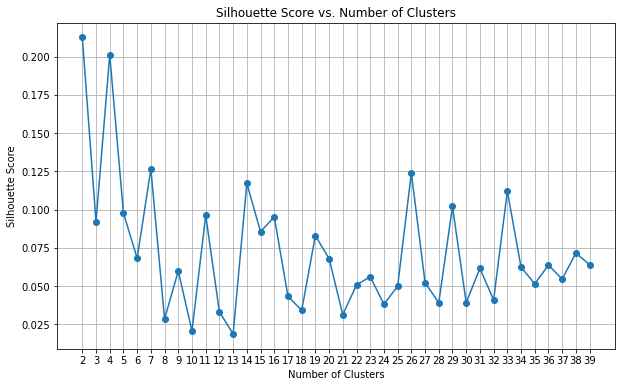

In [153]:
# Plot the silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [154]:
data_Diseases

,Diseases_A bacterial disease on the soles of feet,Diseases_Abdominal neoplasms,Diseases_Abdominal pain,Diseases_Abdominal swelling,Diseases_Abnormal delivery,Diseases_Abortifacient agents,Diseases_Abscess,Diseases_Acaricide,Diseases_Acne vulgaris,Diseases_Acquired immunodeficiency syndrome,...,Diseases_psychological,Diseases_pulmonary,Diseases_reproductive,Diseases_seasonal,Diseases_sickle cell,Diseases_strength and stamina,Diseases_systemic,Diseases_ulcerative,Diseases_variant,Diseases_visceral
Plant_Id,,,,,,,,,,,,,,,,,,,,,
42,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
kmeans_select = data_Diseases.copy()

In [ ]:
#kmeans_select = pd.concat([data_Diseases], axis = 1) 

In [156]:
# Define a range of cluster numbers to try
cluster_range = range(2, 40)  # Adjust the range as needed

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over the range of cluster numbers
for n_clusters in cluster_range:
    # Initialize K-means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit K-means model to the data
    kmeans.fit(data_Diseases)
    
    # Get cluster labels for each data point
    cluster_labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data_Diseases, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

In [158]:
# Iterate over the range of cluster numbers
for n_clusters, score in zip(cluster_range, silhouette_scores):
    print(f"Number of clusters: {n_clusters}, Silhouette score: {score}")

Number of clusters: 2, Silhouette score: 0.29908088049012416
Number of clusters: 3, Silhouette score: 0.29417758030320906
Number of clusters: 4, Silhouette score: 0.2521583200551393
Number of clusters: 5, Silhouette score: 0.17800098693230482
Number of clusters: 6, Silhouette score: 0.21787597489532523
Number of clusters: 7, Silhouette score: 0.29956337000664507
Number of clusters: 8, Silhouette score: 0.27189213216764946
Number of clusters: 9, Silhouette score: 0.20482234799140397
Number of clusters: 10, Silhouette score: 0.21273689554424804
Number of clusters: 11, Silhouette score: 0.17415581199220986
Number of clusters: 12, Silhouette score: 0.22832082027891654
Number of clusters: 13, Silhouette score: 0.30040038800669444
Number of clusters: 14, Silhouette score: 0.29441797867667846
Number of clusters: 15, Silhouette score: 0.28878776531764005
Number of clusters: 16, Silhouette score: 0.2623044672541973
Number of clusters: 17, Silhouette score: 0.2226335764562091
Number of clusters:

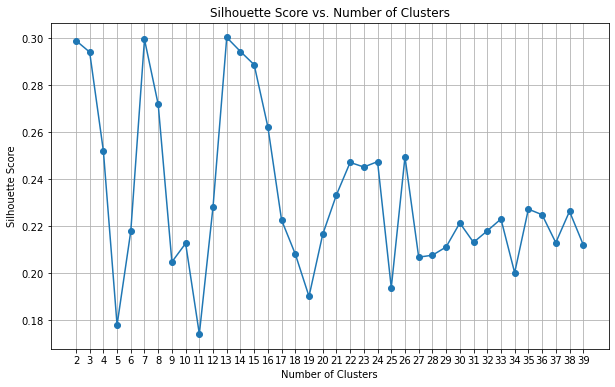

In [159]:
# Plot the silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [160]:
optimal_data = data_Diseases.copy()

In [161]:
# Initialize K-means model with a different number of clusters
kmeans = KMeans(n_clusters=13, random_state=42)  # Adjust the number of clusters as needed

# Fit K-means model to the data
kmeans.fit(optimal_data)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original data
optimal_data['Cluster'] = cluster_labels

# Display the count of data points in each cluster
print(optimal_data['Cluster'].value_counts())

# Calculate the silhouette score
silhouette_avg = silhouette_score(optimal_data, cluster_labels)

print("The average silhouette score is:", silhouette_avg)

/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
0     103
5      28
3       3
4       3
10      2
6       2
11      2
2       2
1       2
9       1
12      1
7       1
8       1
Name: count, dtype: int64
The average silhouette score is: 0.37658616404887474


In [162]:
# Initialize K-means model with a different number of clusters
kmeans = KMeans(n_clusters=7, random_state=42)  # Adjust the number of clusters as needed

# Fit K-means model to the data
kmeans.fit(optimal_data)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original data
optimal_data['Cluster'] = cluster_labels

# Display the count of data points in each cluster
print(optimal_data['Cluster'].value_counts())

# Calculate the silhouette score
silhouette_avg = silhouette_score(optimal_data, cluster_labels)

print("The average silhouette score is:", silhouette_avg)

/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
1    104
0     22
6     12
4      6
2      3
3      2
5      2
Name: count, dtype: int64
The average silhouette score is: 0.31291768921317736


In [165]:
# Initialize K-means model with a different number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed

# Fit K-means model to the data
kmeans.fit(optimal_data)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original data
optimal_data['Cluster'] = cluster_labels

# Display the count of data points in each cluster
print(optimal_data['Cluster'].value_counts())

# Calculate the silhouette score
silhouette_avg = silhouette_score(optimal_data, cluster_labels)

print("The average silhouette score is:", silhouette_avg)

/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
1    101
0     48
2      2
Name: count, dtype: int64
The average silhouette score is: 0.28320643031149456
